# Credit Status Scoring 

**Susan Sun**

**Course:** CISB 60 – ML and DL (Fall, 2024)

**Problem Statement**
* This project aims to analyze credit status through the analysis of a variety of client factors such as job seniority, home ownership, age, and debt. By applying exploratory data analysis, machine learning, and deep learning I attempted to create and train a model that could predict the target variable 'Status' through metrics including accuracy, precision, and recall.
    

This dataset was provided through my class and professor.

**Exploratory Data Analysis**

In [211]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
import re

#Display plots inline
%matplotlib inline

#Filter out warnings
import warnings
warnings.filterwarnings('ignore')

In [144]:
#Read the data file
df=pd.read_csv('data/CreditScoring.csv')

In [145]:
#Show the head of the data frame
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [146]:
#Check the unique values in 'Status'
print(df['Status'].unique())

[1 2 0]


In [147]:
#See how many times 0 is a value in the column 'Status'
zeros = (df['Status'] == 0).sum()
print(zeros)

1


In [148]:
#Remove 0 from 'Status' our target column
df = df[df['Status'] != 0]

In [149]:
#Replace all the 1s with 0 and the 2s with 0 since this will be our target column
df['Status'] = df['Status'].replace({1: 0, 2: 1})
#Check
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,0,9,1,60,30,2,1,3,73,129,0,0,800,846
1,0,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,1,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,0,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,0,0,1,36,26,1,1,1,46,107,0,0,310,910


In [150]:
#Show dataset information to inspect all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4454 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4454 non-null   int64
 1   Seniority  4454 non-null   int64
 2   Home       4454 non-null   int64
 3   Time       4454 non-null   int64
 4   Age        4454 non-null   int64
 5   Marital    4454 non-null   int64
 6   Records    4454 non-null   int64
 7   Job        4454 non-null   int64
 8   Expenses   4454 non-null   int64
 9   Income     4454 non-null   int64
 10  Assets     4454 non-null   int64
 11  Debt       4454 non-null   int64
 12  Amount     4454 non-null   int64
 13  Price      4454 non-null   int64
dtypes: int64(14)
memory usage: 522.0 KB


**Handling Missing Values**

In [151]:
#Show columns with missing data
missing = df.isnull().sum()
print(missing)

Status       0
Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
dtype: int64


In [152]:
#Show if there are duplicates
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
4450    False
4451    False
4452    False
4453    False
4454    False
Length: 4454, dtype: bool


In [153]:
#Exploring Numerical Data
df.describe()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
count,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4.454000e+03,4.454000e+03,4.454000e+03,4454.000000,4454.000000
mean,0.281545,7.986753,2.656938,46.438707,37.080377,1.879210,1.173552,1.676022,55.573417,7.634883e+05,1.060578e+06,4.044728e+05,1038.918276,1462.780198
std,0.449803,8.174306,1.610640,14.655462,10.984598,0.643685,0.378766,0.954089,19.515634,8.704595e+06,1.021870e+07,6.344963e+06,474.545999,628.128120
min,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,0.000000,2.000000,2.000000,36.000000,28.000000,2.000000,1.000000,1.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.250000
50%,0.000000,5.000000,2.000000,48.000000,36.000000,2.000000,1.000000,1.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,1.000000,12.000000,4.000000,60.000000,45.000000,2.000000,1.000000,3.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1691.500000
max,1.000000,48.000000,6.000000,72.000000,68.000000,5.000000,2.000000,4.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [154]:
df.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')

**Data Visualization**

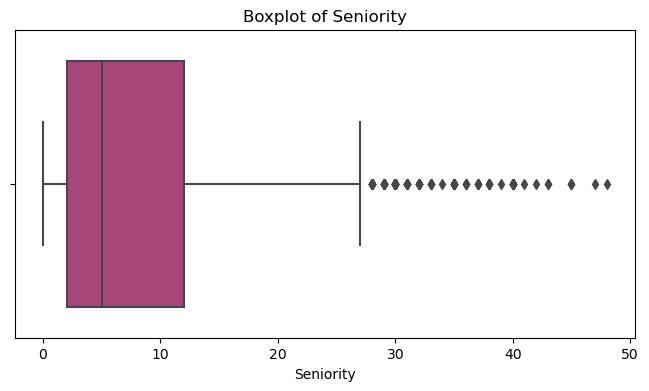

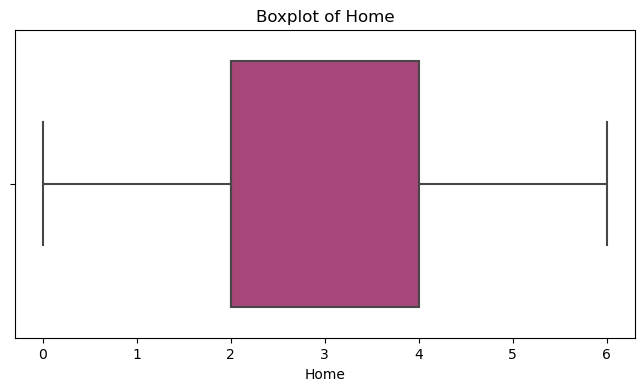

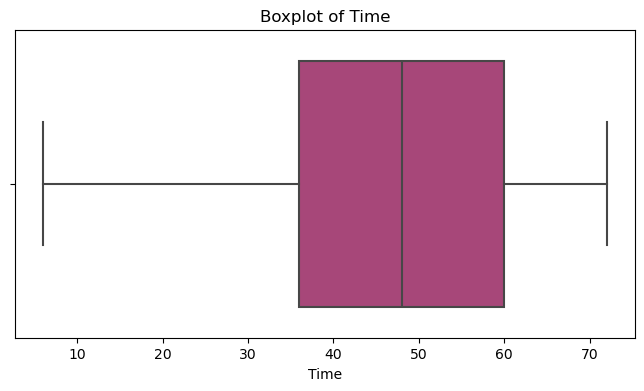

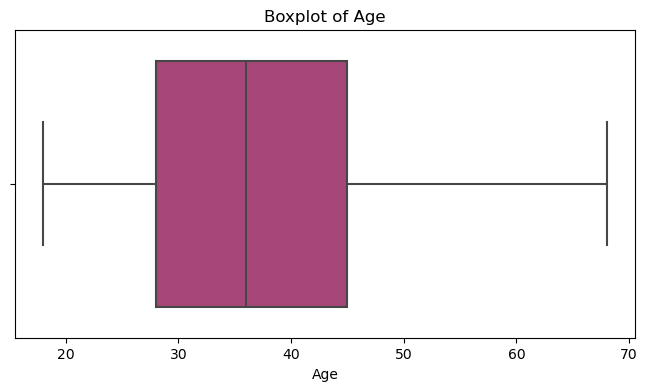

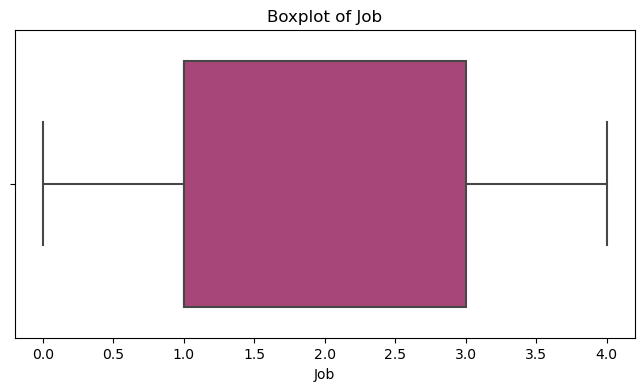

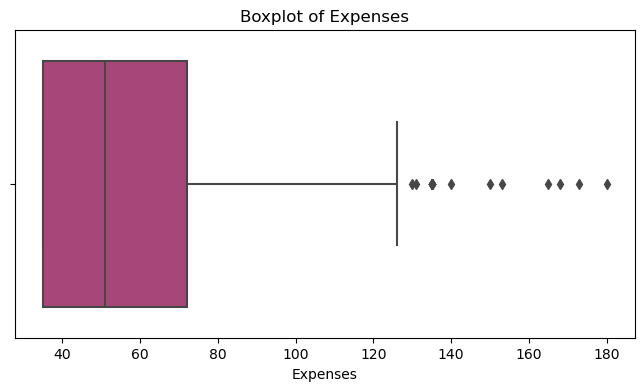

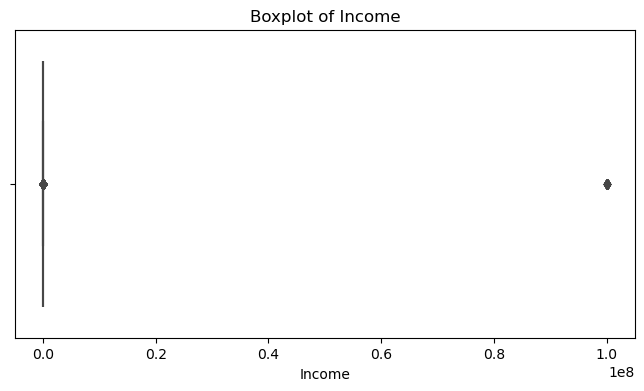

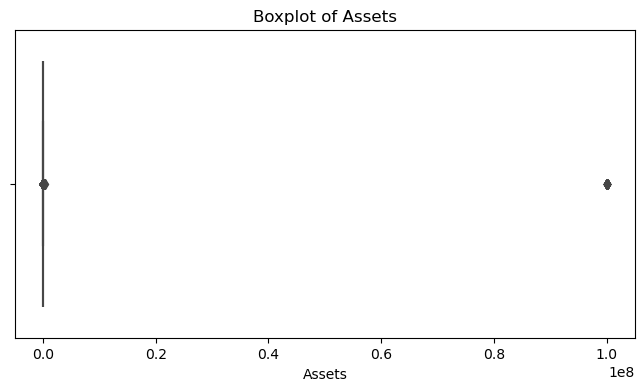

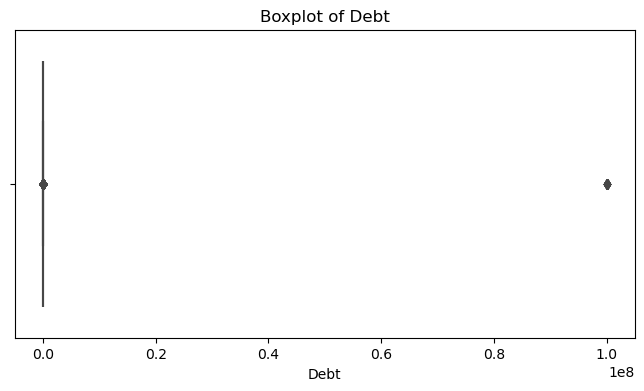

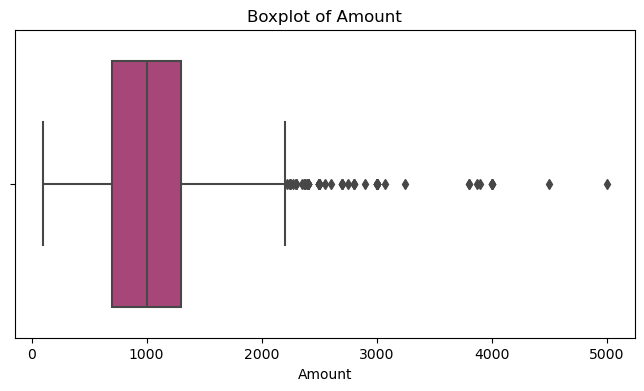

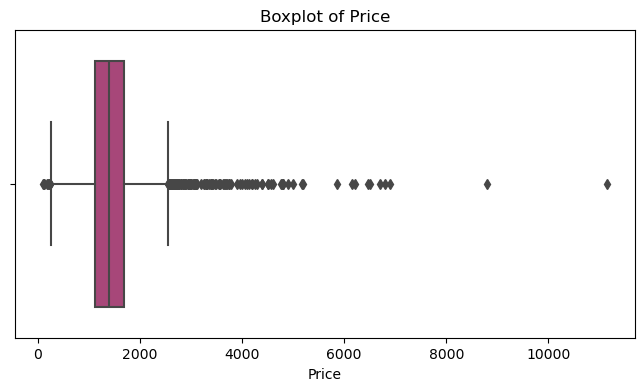

In [155]:
#Create boxplot for columns to check for outliers
numerical_columns = ['Seniority', 'Home', 'Time', 'Age',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price']

#Create a boxplot for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], palette='magma')
    plt.title(f'Boxplot of {col}')
    plt.show()

**Removing Outliers**

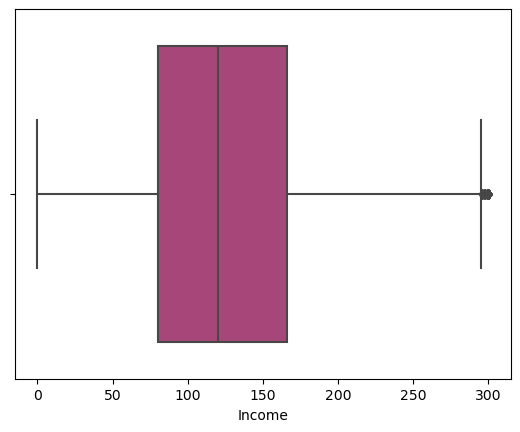

In [156]:
#Cap values in 'Income' at the 5th and 95th percentiles
lower_cap = df['Income'].quantile(0.05)
upper_cap = df['Income'].quantile(0.95)
df['Income'] = df['Income'].clip(lower=lower_cap, upper=upper_cap)

#Visualizing the income distribution after capping
sns.boxplot(x=df['Income'], palette='magma')
plt.show()

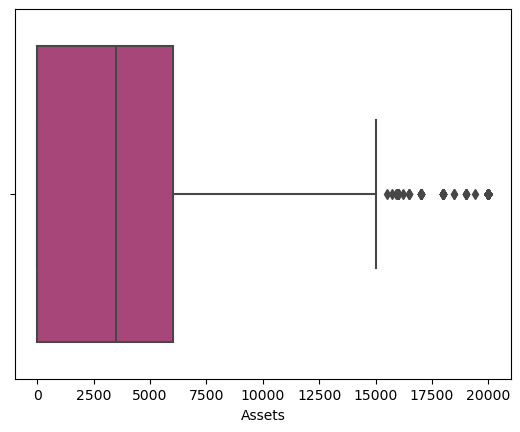

In [157]:
#Cap values in 'Assets' at the 5th and 95th percentiles
lower_cap = df['Assets'].quantile(0.05)
upper_cap = df['Assets'].quantile(0.95)
df['Assets'] = df['Assets'].clip(lower=lower_cap, upper=upper_cap)

#Visualize Assets distribution after capping
sns.boxplot(x=df['Assets'], palette='magma')
plt.show()

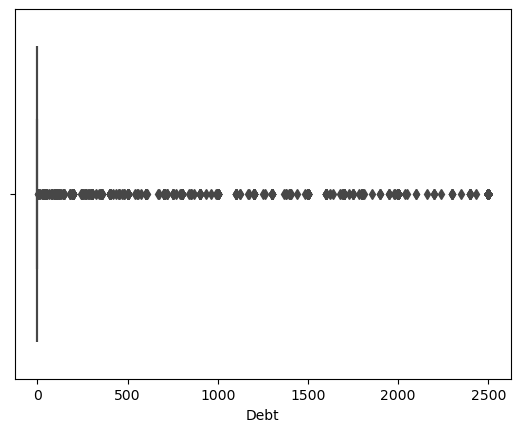

In [158]:
#Cap values in 'Debt' at the 5th and 95th percentiles
lower_cap = df['Debt'].quantile(0.05)
upper_cap = df['Debt'].quantile(0.95)
df['Debt'] = df['Debt'].clip(lower=lower_cap, upper=upper_cap)

#Visualizing Debt distribution after capping
sns.boxplot(x=df['Debt'], palette='magma')
plt.show()

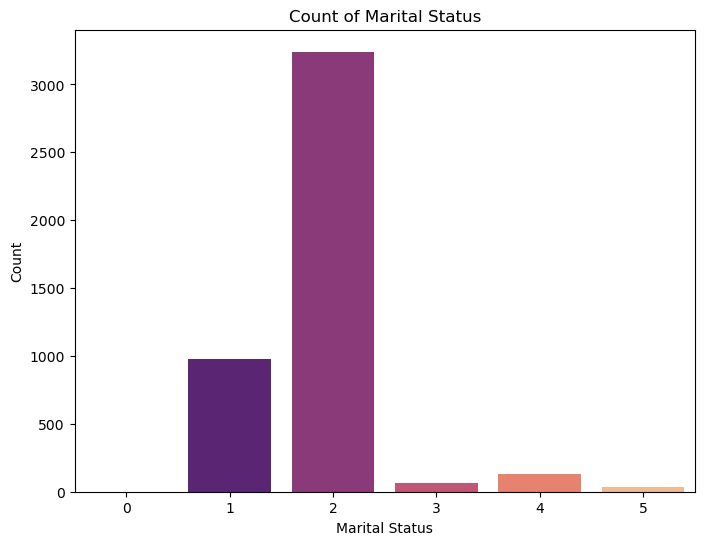

In [159]:
#Make a barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital', data=df, palette='magma')
#Add labels
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
#Plot
plt.show()

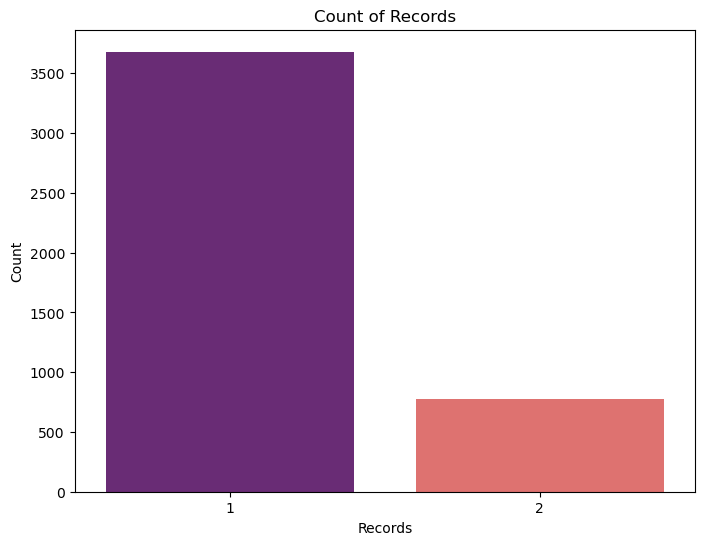

In [160]:
#Make a barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Records', data=df, palette='magma')
#Add labels
plt.title('Count of Records')
plt.xlabel('Records')
plt.ylabel('Count')
#Plot
plt.show()

**Visualize Distribution Skewness**

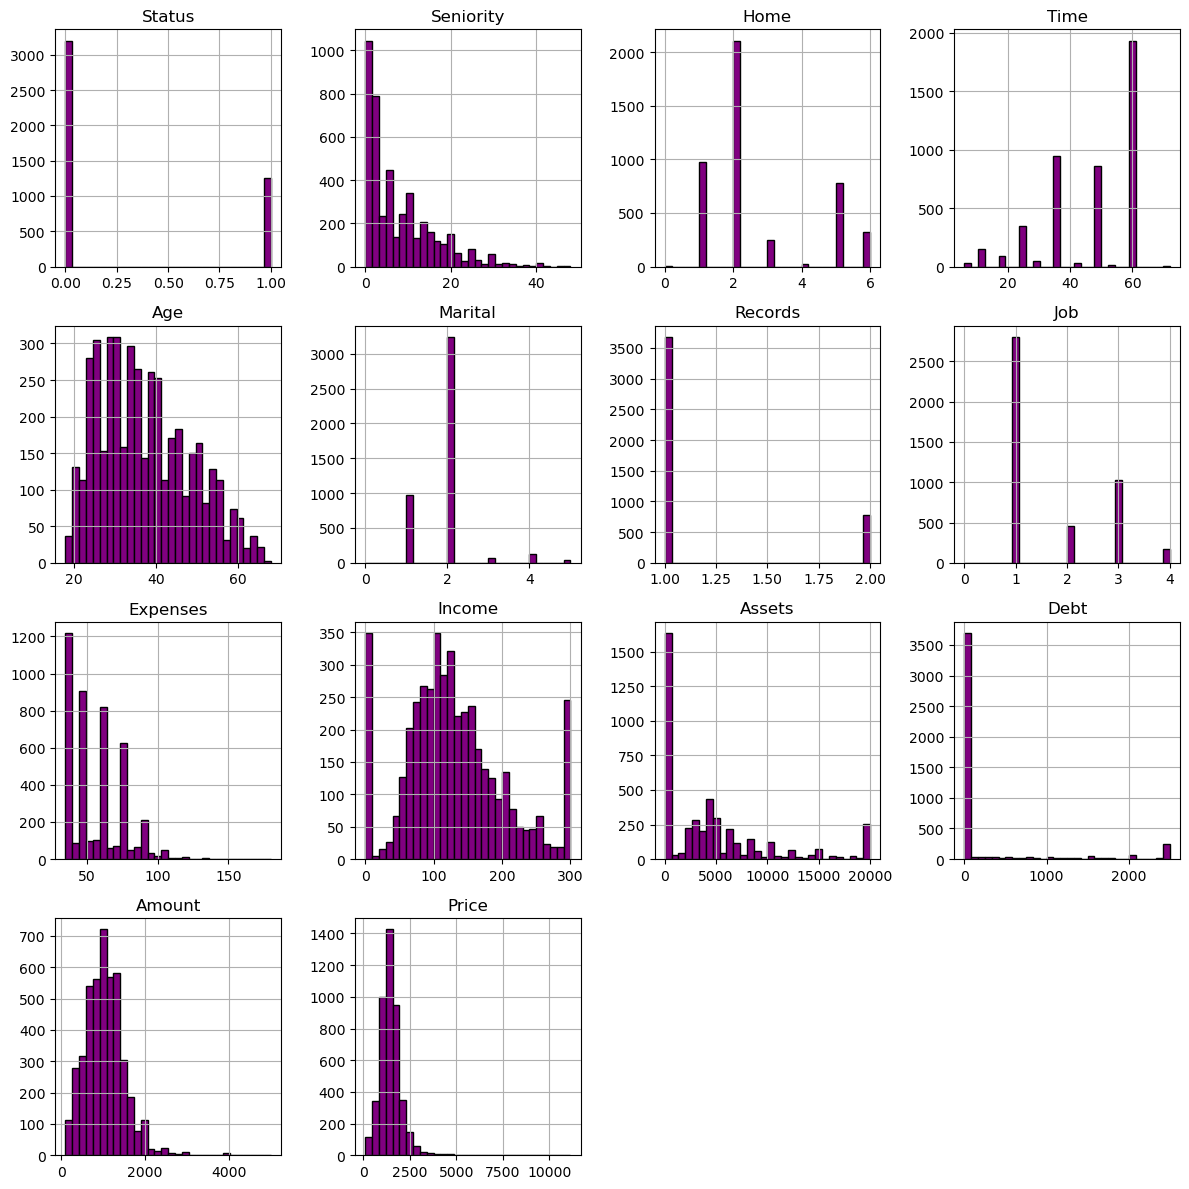

In [162]:
#Create a heatmat to check correlation
df.hist(figsize=(12, 12), bins=30, edgecolor='black',color='#800080')
#Adjust layout to prevent overlap and make space for labels
plt.tight_layout()
plt.show()

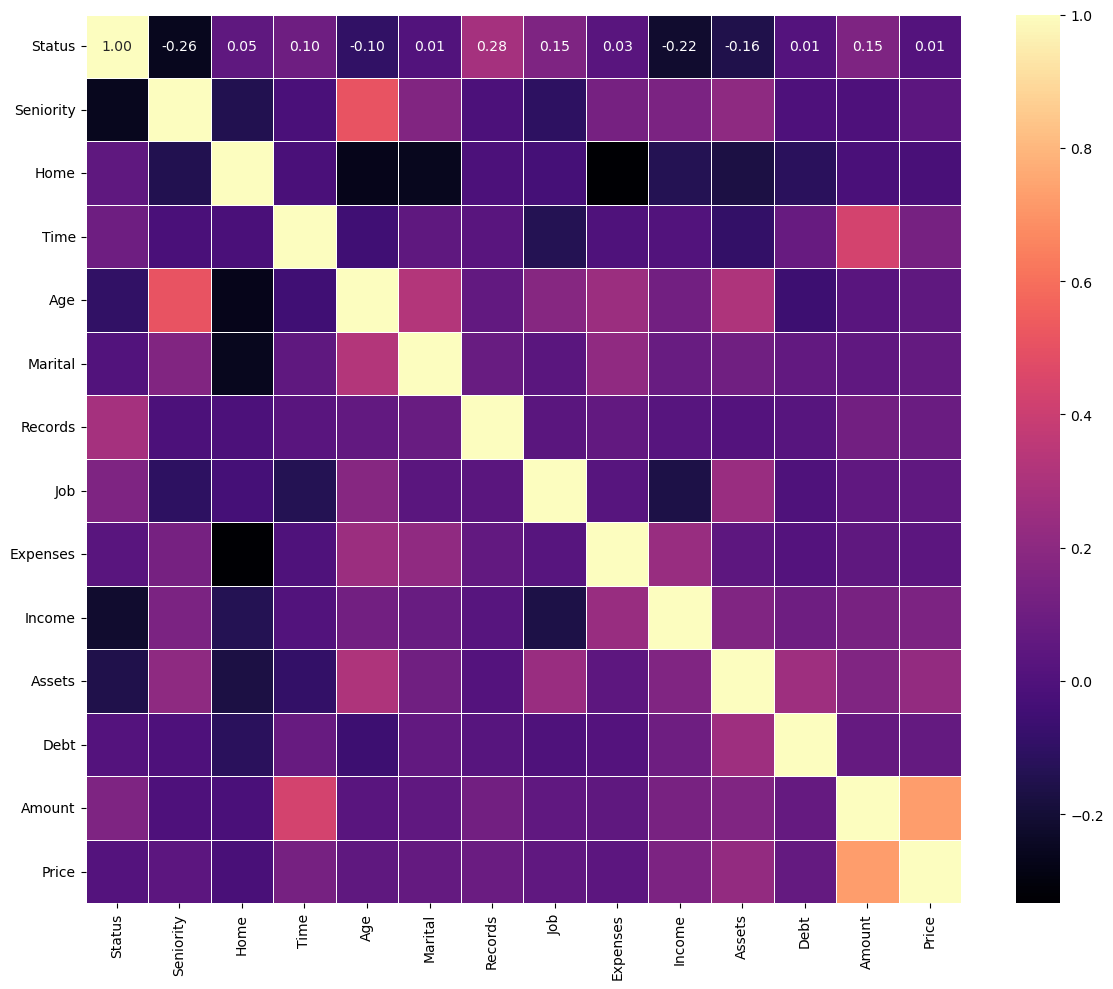

In [163]:
#Calculate correlation matrix for numerical columns
correlation_matrix = df.corr()
#Create a heatmap 
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5, fmt='.2f', cbar=True)
#Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [164]:
#View the correlation matrix
correlation_matrix

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
Status,1.000000,-0.260393,0.051208,0.100627,-0.095301,0.009673,0.278605,0.152416,0.028855,-0.216653,-0.155182,0.010284,0.154549,0.010740
Seniority,-0.260393,1.000000,-0.145891,-0.021374,0.505920,0.163544,-0.015649,-0.109307,0.125873,0.144312,0.205479,-0.008939,-0.007913,0.040887
Home,0.051208,-0.145891,1.000000,-0.020927,-0.270770,-0.260703,-0.013183,-0.032010,-0.334085,-0.138212,-0.171311,-0.116991,-0.019608,-0.026576
Time,0.100627,-0.021374,-0.020927,1.000000,-0.051749,0.050277,0.028193,-0.138328,-0.000840,0.007485,-0.094359,0.077572,0.430936,0.129674
Age,-0.095301,0.505920,-0.270770,-0.051749,1.000000,0.325427,0.060067,0.179306,0.248059,0.110416,0.310701,-0.062057,0.029154,0.048916
Marital,0.009673,0.163544,-0.260703,0.050277,0.325427,1.000000,0.082319,0.033897,0.210062,0.080185,0.104265,0.057673,0.054445,0.062761
Records,0.278605,-0.015649,-0.013183,0.028193,0.060067,0.082319,1.000000,0.033827,0.057229,0.023779,0.014447,0.024882,0.110464,0.085219
Job,0.152416,-0.109307,-0.032010,-0.138328,0.179306,0.033897,0.033827,1.000000,0.024006,-0.164664,0.239425,-0.001991,0.055996,0.056611
Expenses,0.028855,0.125873,-0.334085,-0.000840,0.248059,0.210062,0.057229,0.024006,1.000000,0.235894,0.043083,0.010504,0.049200,0.040330
Income,-0.216653,0.144312,-0.138212,0.007485,0.110416,0.080185,0.023779,-0.164664,0.235894,1.000000,0.159753,0.102577,0.130265,0.147660


**Key Takeaways**
* Records has the strongest positive correlation with the target variable 'Status'
* Seniority has a moderately negative correlation, so clients with a higher seniority as less likely to belong with a certain 'Status'
* Income has a slight negative correlation, meaning a higher income could lead to a decrease in chances of a certain 'Status

**Machine Learning Section**

(array([3200.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1254.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

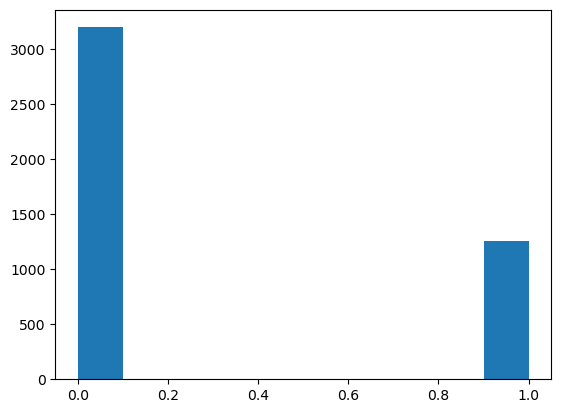

In [165]:
#Check whether the dataset is inbalanced
plt.hist(df.Status)

In [166]:
#Check the balance
print(df['Status'].value_counts())

Status
0    3200
1    1254
Name: count, dtype: int64


The data is imbalanced with over double the amount of status 1 vs 0

**Logistic Regression**

In [177]:
#Copy my dataframe to work with 
df_copy = df.copy()

In [185]:
from sklearn.preprocessing import StandardScaler

#Initialize the scaler
scaler = StandardScaler()

#Apply scaling
X_scaled = scaler.fit_transform(df_copy.drop(columns=['Status']))

In [187]:
from sklearn.model_selection import train_test_split

#Separate X and y
X = df_copy.drop(columns=['Status'])
y = df_copy['Status']

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [188]:
#Check the shape of the split data
print(X.shape, y.shape)

(4454, 13) (4454,)


In [189]:
from sklearn.linear_model import LogisticRegression

#Initialize the logistic regression model
model = LogisticRegression()

#Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

In [190]:
from sklearn.metrics import accuracy_score

#Predict the target values for the test set
y_pred = model.predict(X_test)

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7710437710437711


In [200]:
from sklearn.metrics import classification_report

#Create a classification report
print("Classification Report for Logistic Regression Mode\l:n", classification_report(y_test, y_pred))

Classification Report for Logistic Regression Mode\l:n               precision    recall  f1-score   support

           0       0.78      0.94      0.85       615
           1       0.74      0.40      0.52       276

    accuracy                           0.77       891
   macro avg       0.76      0.67      0.69       891
weighted avg       0.77      0.77      0.75       891



In [193]:
from sklearn.metrics import classification_report

#Print a Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[576  39]
 [165 111]]


Due to the imbalance of the data, there is a significantly higher recall for class 0 than class 1. Most importantly, the recall for class 1 is pretty low at 0.40, meaning it is only correctly predicting 40% of class 1 correctly.

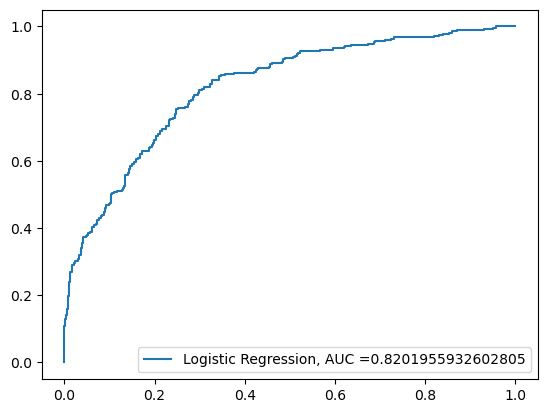

In [217]:
from sklearn import metrics

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, AUC ="+str(auc))
plt.legend(loc=4)
plt.show()

The Area Under the ROC Curve is 0.82 which suggests that the logistic regression model is effective at distinguishing between the two classes.

**Random Forest Classifier**

In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
#Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#Fit the model to the training data
rf_model.fit(X_train, y_train)
#Predict the test data
y_pred_rf = rf_model.predict(X_test)

In [197]:
#Create a Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Random Forest - Confusion Matrix:\n{conf_matrix_rf}")

Random Forest - Confusion Matrix:
[[564  51]
 [154 122]]


In [199]:
#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest Model:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.7699214365881033
Classification Report for Random Forest Model:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       615
           1       0.71      0.44      0.54       276

    accuracy                           0.77       891
   macro avg       0.75      0.68      0.69       891
weighted avg       0.76      0.77      0.75       891



Using Random Forest Classifier instead of Logistic Regression does not really effect the accuracy score however, it does slightly improve recall for class 1, which has improved from a previous 40% to now 44%. However, both models could use improvement.

Text(0.5, 427.9555555555555, 'Predicted label')

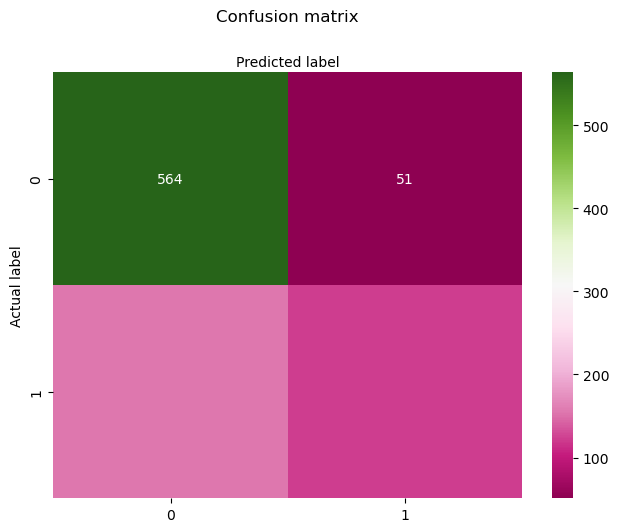

In [213]:
class_names=[0,1] #name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Plot confusion matrix as a heatmap
sns.heatmap(pd.DataFrame(conf_matrix_rf), annot=True, cmap="PiYG" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Key Takeaways**
* The Random Forest Classifier model has good accuracy and precision, which means that it doesn't have many false positives. However, the recall is low as previously discussed, so it is struggling to accurately identify the actual positive cases.

**Deep Learning Section**

In [299]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = df.drop(columns=['Status'])  #Drop the target
scaled_features = scaler.fit_transform(features)
target = df['Status']

In [300]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(scaled_features.shape[1],)), #Adjust input shape for scaled
    Dropout(0.3),  #Prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  #For binary classification #Output layer
])

In [301]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='binary_crossentropy',  #Adjust loss for binary classification
    metrics=['accuracy']  
)

In [302]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(scaled_features, target, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [303]:
#Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,  
    batch_size=32, 
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7090 - loss: 0.5883 - val_accuracy: 0.7650 - val_loss: 0.4953
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7457 - loss: 0.5138 - val_accuracy: 0.7710 - val_loss: 0.4754
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7668 - loss: 0.4874 - val_accuracy: 0.7710 - val_loss: 0.4669
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7710 - loss: 0.4795 - val_accuracy: 0.7754 - val_loss: 0.4610
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7824 - loss: 0.4614 - val_accuracy: 0.7784 - val_loss: 0.4603
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7769 - loss: 0.4718 - val_accuracy: 0.7769 - val_loss: 0.4554
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7868 - loss: 0.4611 - val_accuracy: 0.7829 - val_loss: 0.4595
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7918 - loss: 0.4507 - val_accuracy: 0.7814 - val_loss:

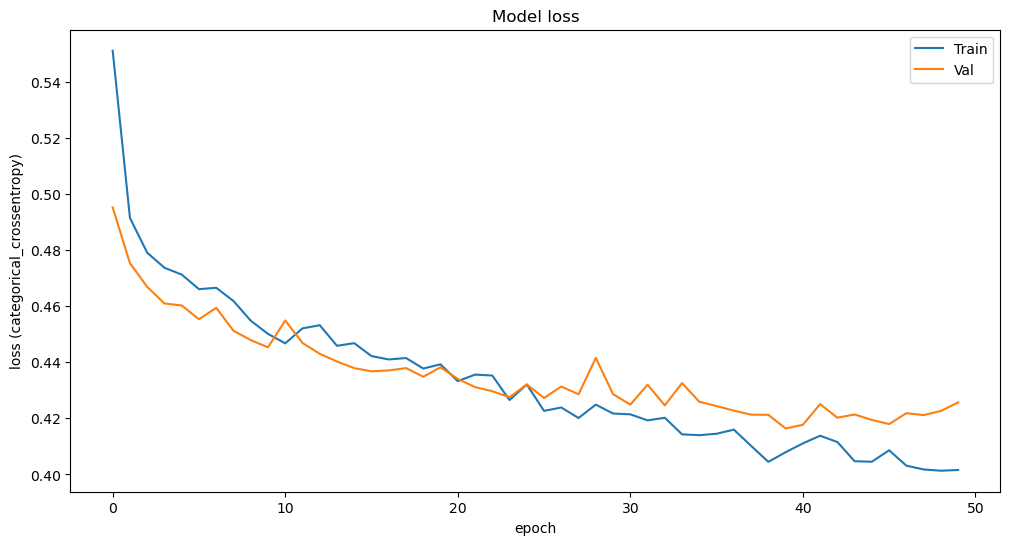

In [304]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (categorical_crossentropy)')
plt.legend(['Train', 'Val'], loc='upper right')

The plot shows that the training data and validation data loss both decrease consistently throughout the epochs. This suggests that the model is learning from the training data and not the validation data.

In [305]:
loss, accuracy = model.evaluate(X_valid, y_valid)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8072 - loss: 0.4462 


**Incorporating TensorBoard into the Model**

In [318]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
import tensorflow as tf

#Generate the logs for Tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,  
    batch_size=32, 
    callbacks=[tensorboard_callback]    
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8184 - loss: 0.3986 - val_accuracy: 0.8039 - val_loss: 0.4248
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8093 - loss: 0.4048 - val_accuracy: 0.8024 - val_loss: 0.4265
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8082 - loss: 0.3994 - val_accuracy: 0.7979 - val_loss: 0.4227
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8130 - loss: 0.4029 - val_accuracy: 0.8024 - val_loss: 0.4196
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8156 - loss: 0.3863 - val_accuracy: 0.7994 - val_loss: 0.4216
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8066 - loss: 0.4060 - val_accuracy: 0.7994 - val_loss: 0.4307
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8169 - loss: 0.3985 - val_accuracy: 0.7979 - val_loss: 0.4284
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8099 - loss: 0.3936 - val_accuracy: 0.7949 - val_loss:

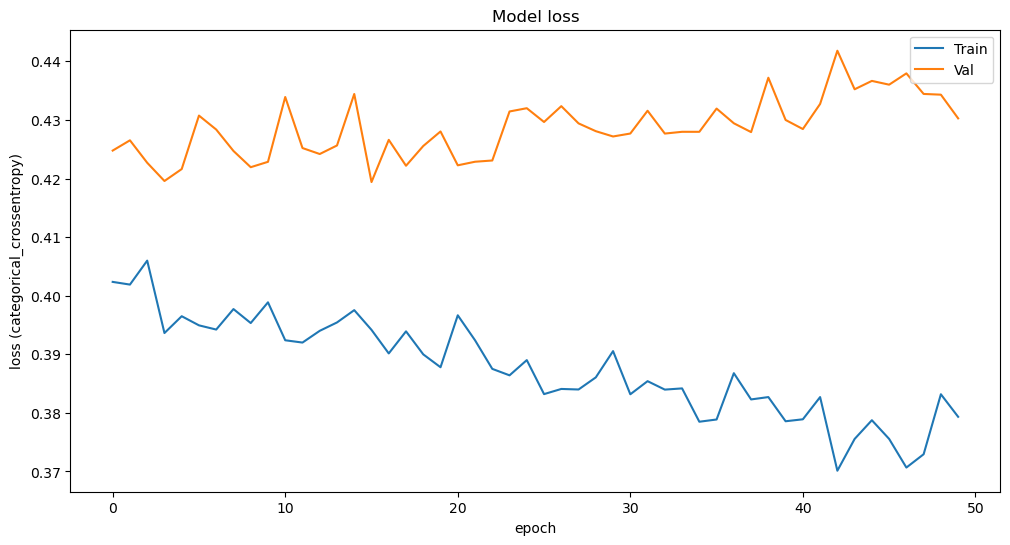

In [319]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (categorical_crossentropy)')
plt.legend(['Train', 'Val'], loc='upper right')

In [320]:
loss, accuracy = model.evaluate(X_valid, y_valid)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.4419


In [321]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 6724), started 0:07:56 ago. (Use '!kill 6724' to kill it.)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


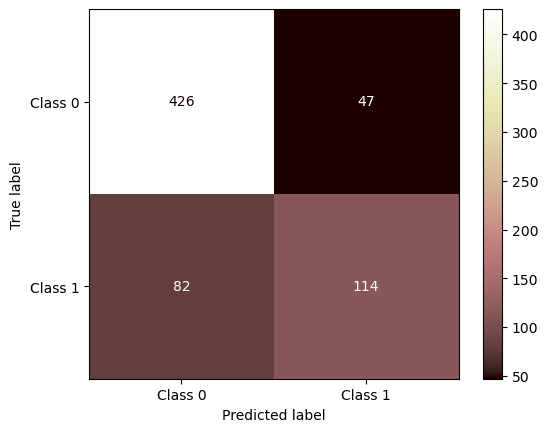

In [326]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Predict on the test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

#Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='pink')

**Key Takeaways**
* There are 426 true negatives.
* There are 82 false negatives.
* There are 47 False positives.
* There are 114 True positives.

In [323]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.84      0.90      0.87       473
     Class 1       0.71      0.58      0.64       196

    accuracy                           0.81       669
   macro avg       0.77      0.74      0.75       669
weighted avg       0.80      0.81      0.80       669



After incorporating TensorBoard into my neural network model the accuracy did in fact improve as well as the recall, which when I previously used logistic regression and random forest the recall was only 40% and 44% for class 1. Now though the recall for class 1 has improved to 58%

**References**
   - Much of the above code was a variation of the code provided through coursework and provided examples.